In [1]:
%cd ../../repos/Attention-Based-Aspect-Extraction/history/

D:\Programming\Research\Thesis\repos\Attention-Based-Aspect-Extraction\history


In [2]:
%pwd

'D:\\Programming\\Research\\Thesis\\repos\\Attention-Based-Aspect-Extraction\\history'

In [3]:
import pandas as pd

import re

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def parse_abae_similarities(n_aspects: int) -> pd.DataFrame:    
    filename = f'./output_review_{n_aspects}/review/aspect.log'
    try:
        with open(filename, 'rt', encoding='UTF-8') as f:
            cur_file = f.read().split('\n')
    except FileNotFoundError as e:
        print(f'File `{filename}` does not exist.')
        return

    sims = list(filter(lambda s: 'aspect' not in s.lower() and s, cur_file))
    # print(sims[0])
    sims = list(map(lambda s: re.findall('0\.\d+', s), sims))
    sims = pd.DataFrame(sims).astype(float)
    
    return sims

parsed = parse_abae_similarities(10)
parsed

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.800795,0.364474,0.348635,0.346817,0.343096,0.333122,0.327283,0.324226,0.320919,0.320100,...,0.261506,0.260727,0.260559,0.260219,0.259932,0.259239,0.258908,0.258434,0.258274,0.257352
1,0.575733,0.546578,0.541236,0.533032,0.531861,0.530664,0.521975,0.517275,0.515630,0.507108,...,0.416589,0.416254,0.415794,0.415668,0.414635,0.414484,0.414109,0.412923,0.412867,0.412492
2,0.586090,0.550977,0.549913,0.535747,0.533826,0.531846,0.527673,0.526390,0.524640,0.522159,...,0.398691,0.398505,0.397902,0.397157,0.396717,0.396611,0.396113,0.395640,0.395072,0.394499
3,0.707611,0.668504,0.662677,0.636562,0.635977,0.627081,0.603200,0.591721,0.578099,0.573858,...,0.401919,0.401045,0.400976,0.400131,0.399875,0.399777,0.399634,0.398270,0.396779,0.396223
4,0.675178,0.668869,0.664310,0.657316,0.655216,0.645990,0.644885,0.643411,0.630328,0.617386,...,0.527764,0.527280,0.526032,0.525786,0.525776,0.525742,0.524701,0.524461,0.524021,0.523694
5,0.592191,0.574305,0.561334,0.556418,0.552680,0.548640,0.538550,0.536759,0.536236,0.527346,...,0.431729,0.430408,0.430040,0.429556,0.429000,0.428833,0.428610,0.428379,0.428366,0.428330
6,0.499529,0.491092,0.483173,0.468652,0.461836,0.455558,0.445961,0.444790,0.442848,0.442698,...,0.357295,0.356821,0.355901,0.355867,0.355399,0.355251,0.354784,0.354119,0.352594,0.352588
7,0.755038,0.717161,0.713447,0.691000,0.683830,0.677599,0.673789,0.668070,0.666918,0.658222,...,0.578282,0.576754,0.575958,0.575862,0.575672,0.573635,0.571302,0.568547,0.568206,0.567469
8,0.675025,0.648923,0.616699,0.616212,0.596136,0.595256,0.593031,0.592001,0.581552,0.579932,...,0.472076,0.471985,0.471820,0.471468,0.471233,0.470456,0.470033,0.469502,0.469440,0.469412
9,0.470020,0.459097,0.456257,0.453045,0.452598,0.451837,0.444698,0.440105,0.431245,0.429643,...,0.336410,0.336017,0.335249,0.335043,0.333910,0.333610,0.332832,0.331904,0.331411,0.329913


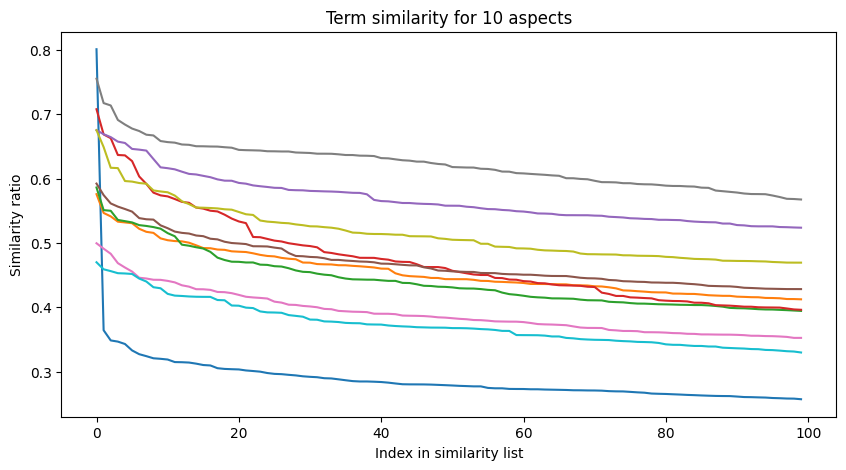

In [5]:
def plot_abae_sims(parsed: pd.DataFrame) -> None:
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    
    for i in range(parsed.shape[0]):
        plt.plot(parsed.iloc[i, :].sort_values(ascending=True))
        plt.xlabel('Index in similarity list')
        plt.ylabel('Similarity ratio')
        plt.title(f'Term similarity for {parsed.shape[0]} aspects')
    plt.show()

plot_abae_sims(parsed)

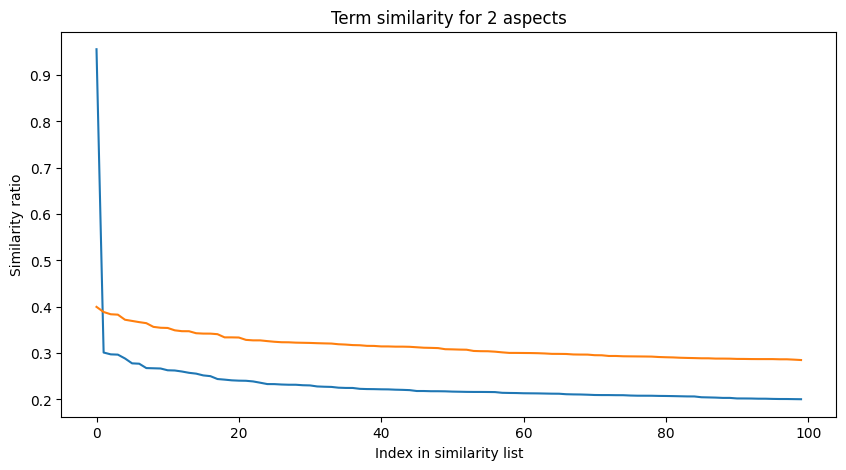

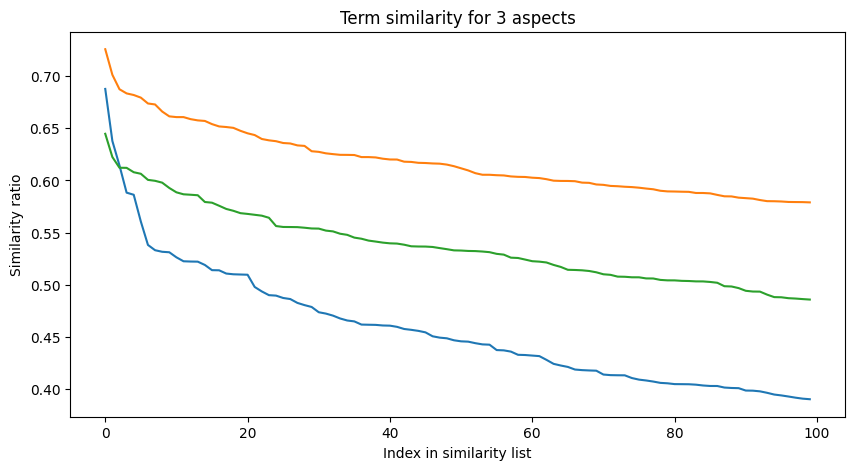

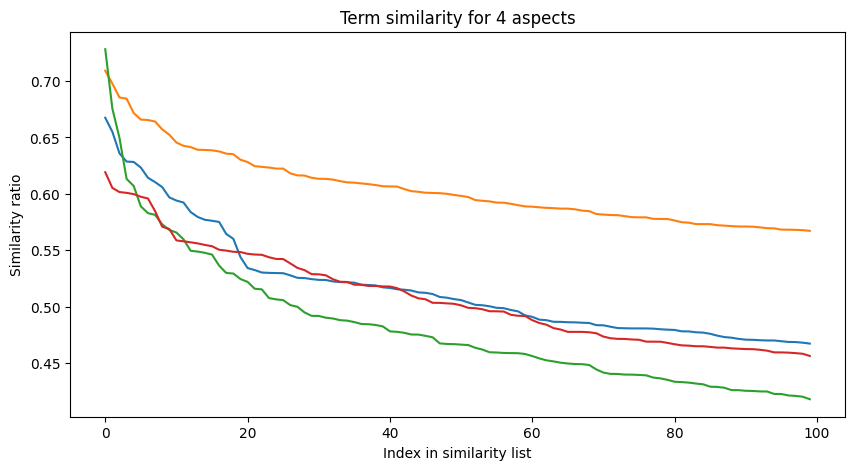

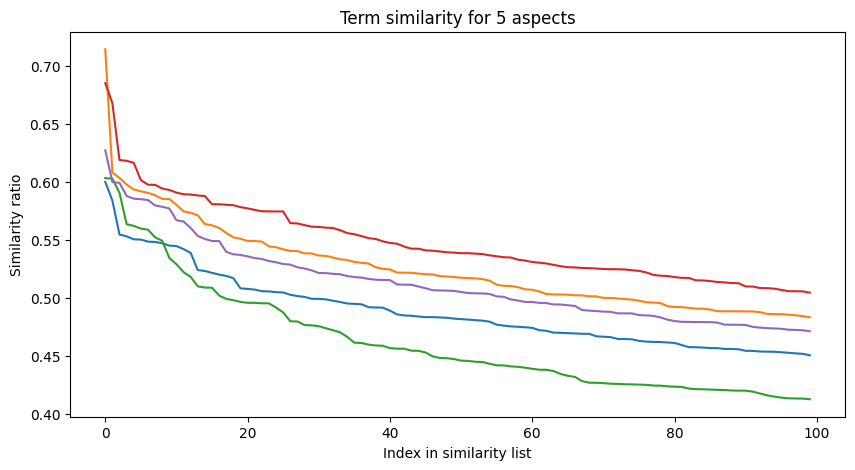

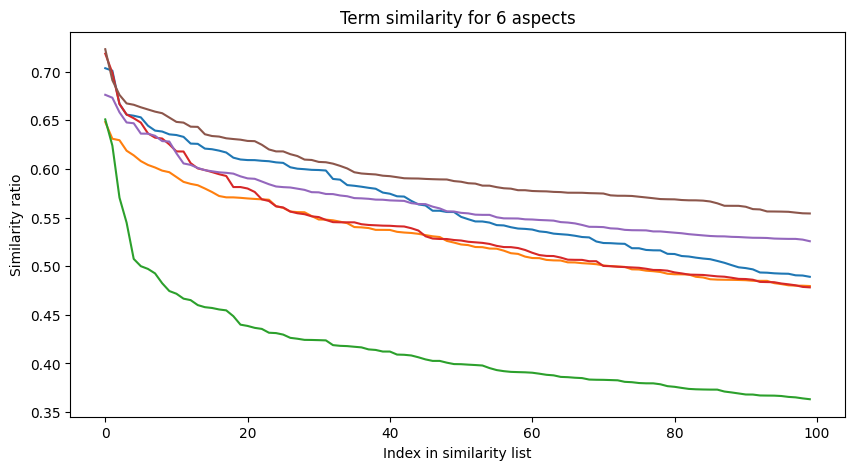

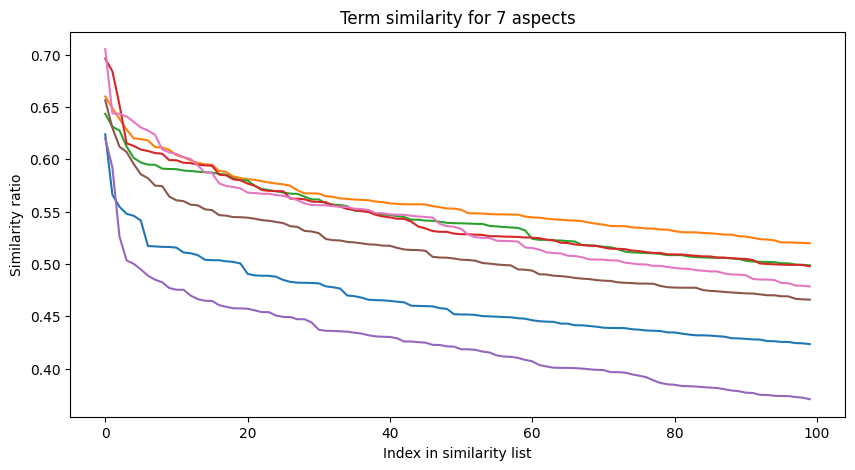

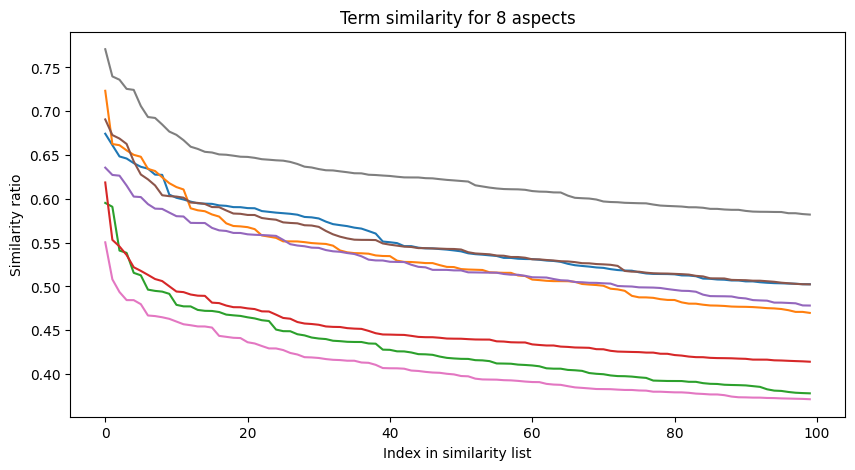

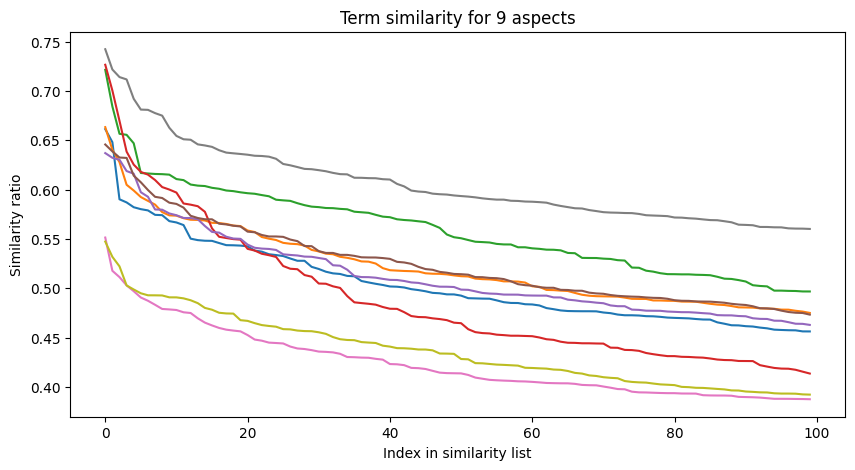

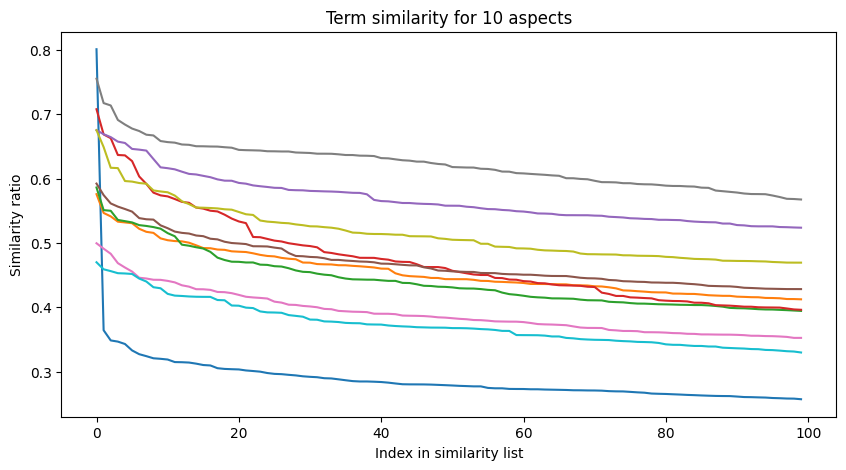

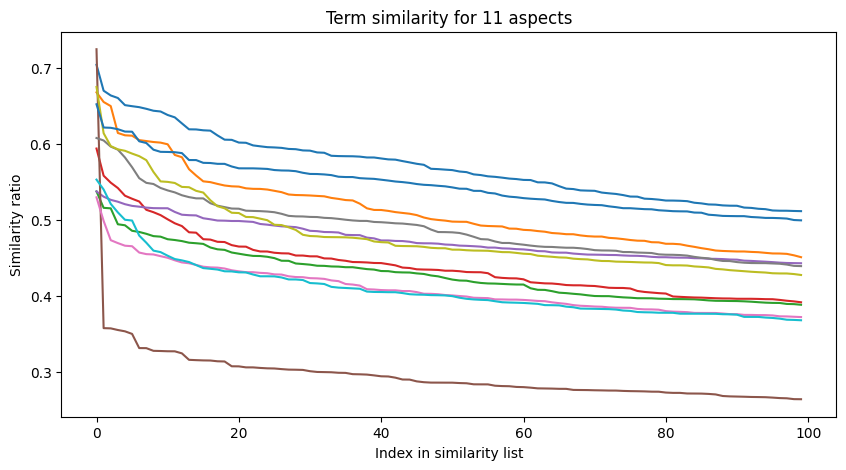

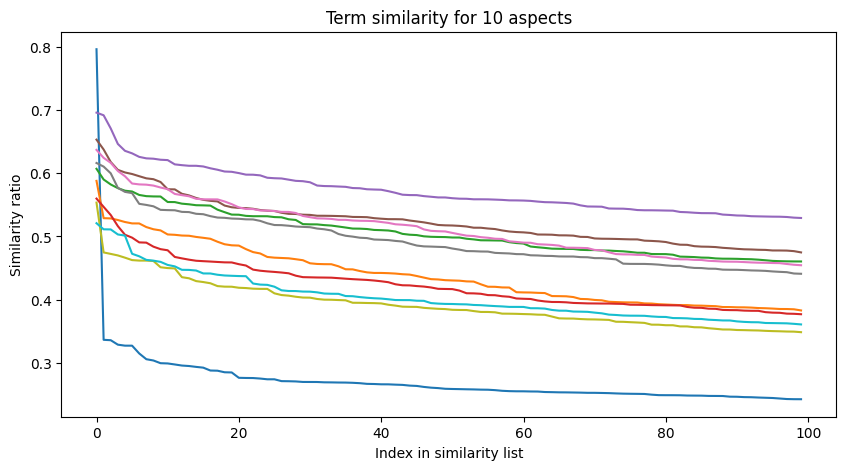

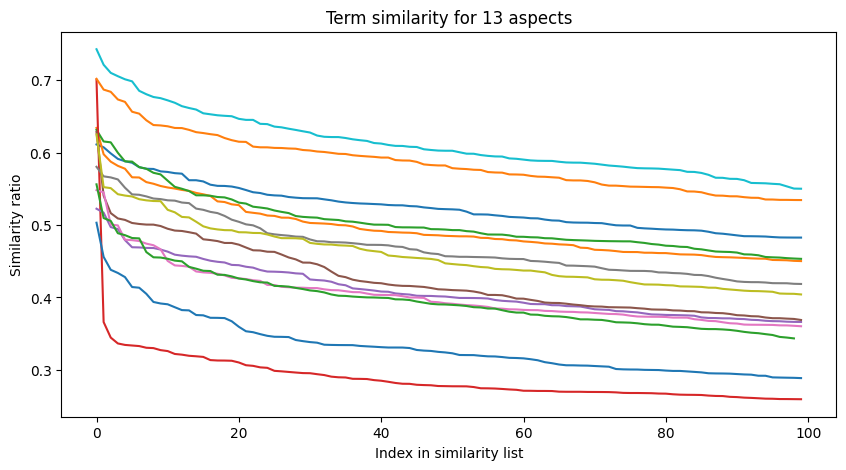

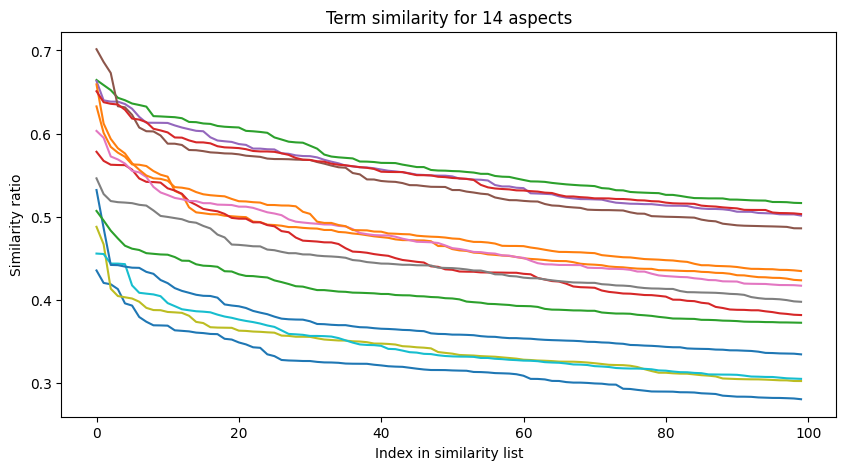

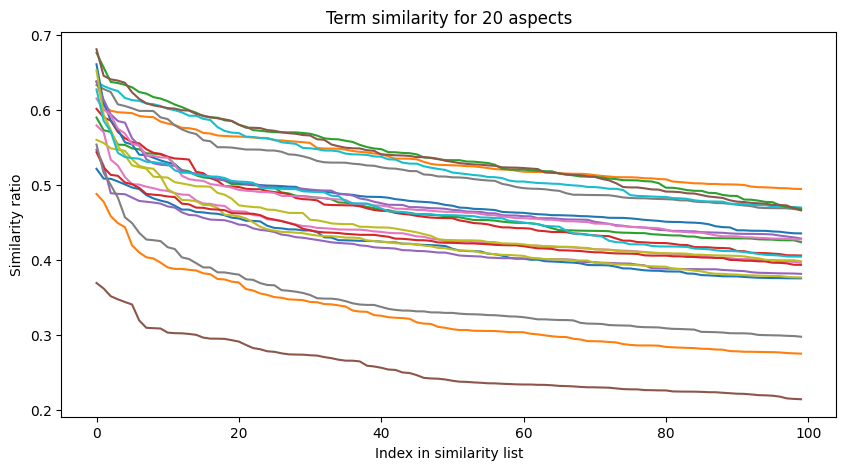

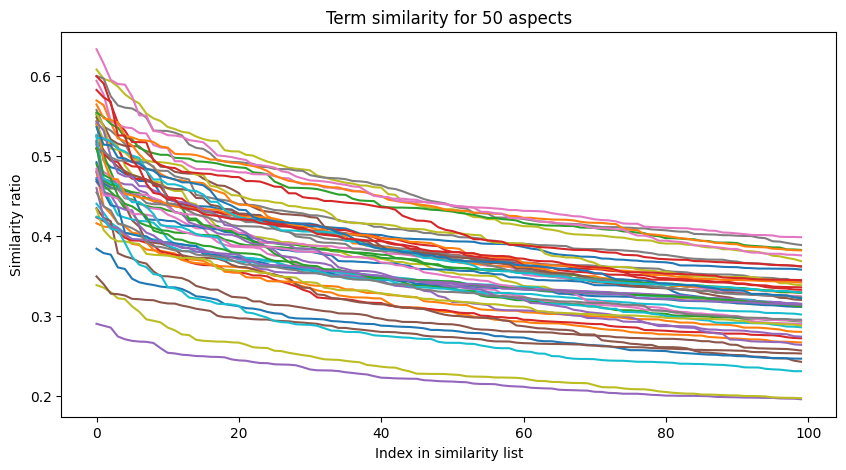

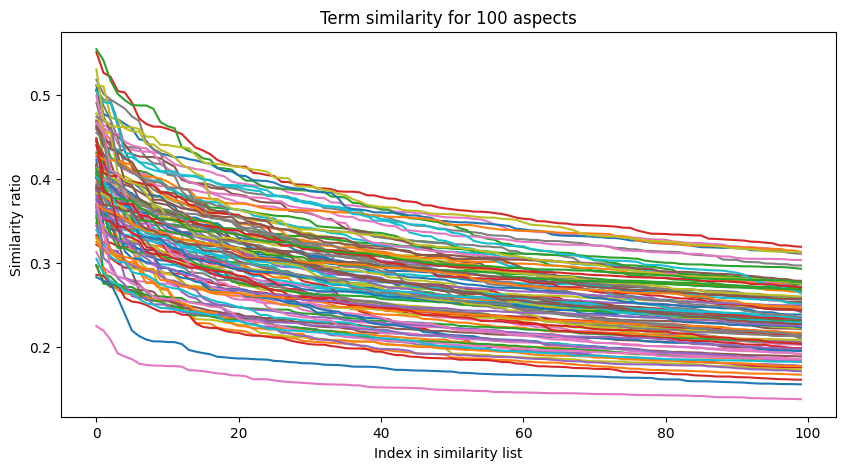

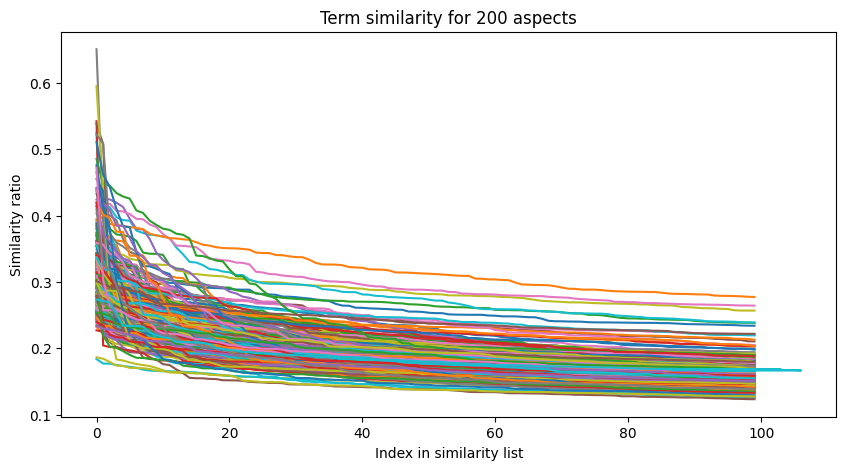

In [6]:
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 50, 100, 200]:
    parsed = parse_abae_similarities(i)
    plot_abae_sims(parsed)